# Project
## Analysis of tips data
## Student: Vitalijs Smirniovs
## ID: G00317774

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [86]:
# load tips data
df = sns.load_dataset("tips")
# view top 5 rows of data
print(df.head())
# view last 5 rows of data
print(df.tail())
#data info
print(df.info())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
     total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          24

After loading tips data set as a data frame, we check if data loaded correctly. For this we call heah/tail commands. data.info() shows that three vars are numerical and four vars are categorical.

In [87]:
# summary stats for nmerical data
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


The average bill is approx 20 dollars, average tip is approx 3 dollars and average size of the party is 2.6 people (if we can describe people in fractions).

Male      157
Female     87
Name: sex, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64


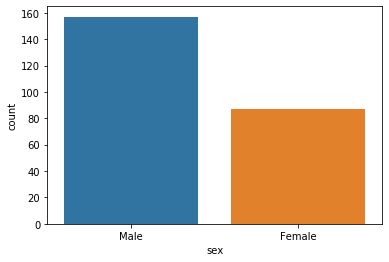

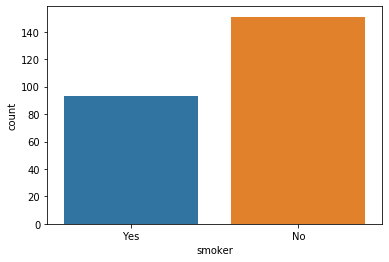

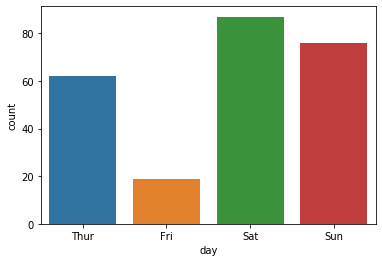

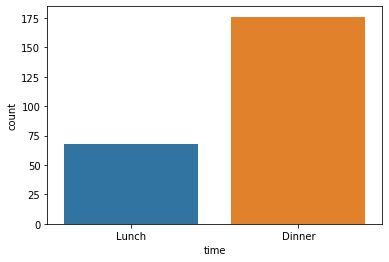

In [97]:
# print frequencis for categorical vars
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['day'].value_counts())
print(df['time'].value_counts())
# visualise
sns.countplot(x='sex', data=df)
plt.show()
sns.countplot(x='smoker', data=df)
plt.show()
sns.countplot(x='day', data=df)
plt.show()
sns.countplot(x='time', data=df)
plt.show()


In [98]:
# group data by category and see if averages differ
grsex = df.groupby("sex")
grsmoker = df.groupby("smoker")
grday = df.groupby("day")
grtime = df.groupby("time")

In [99]:
print(grsex.describe())
print(grsmoker.describe())
print(grday.describe())
print(grtime.describe())

       total_bill                                                         \
            count       mean       std   min    25%    50%    75%    max   
sex                                                                        
Male        157.0  20.744076  9.246469  7.25  14.00  18.35  24.71  50.81   
Female       87.0  18.056897  8.009209  3.07  12.75  16.40  21.52  44.30   

          tip            ...               size                                \
        count      mean  ...   75%   max  count      mean       std  min  25%   
sex                      ...                                                    
Male    157.0  3.089618  ...  3.76  10.0  157.0  2.630573  0.955997  1.0  2.0   
Female   87.0  2.833448  ...  3.50   6.5   87.0  2.459770  0.937644  1.0  2.0   

                       
        50%  75%  max  
sex                    
Male    2.0  3.0  6.0  
Female  2.0  3.0  6.0  

[2 rows x 24 columns]
       total_bill                                                     

In [ ]:
# in this cell I describe for 2 groups smoker and sex to compare tip and size within male and female group
print(df.pivot(columns = 'smoker').describe())

print(df.pivot(columns = 'sex').describe())

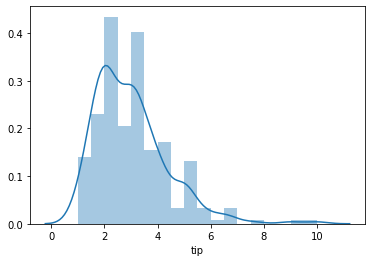

In [27]:
sns.distplot(df["tip"])

In [40]:
male = df.loc[df["sex"] == "Male" , ["sex", "tip"]]
female = df.loc[df["sex"] == "Female" , ["sex", "tip"]]

In [41]:
male.head()

,sex,tip
1,Male,1.66
2,Male,3.50
3,Male,3.31
5,Male,4.71
6,Male,2.00


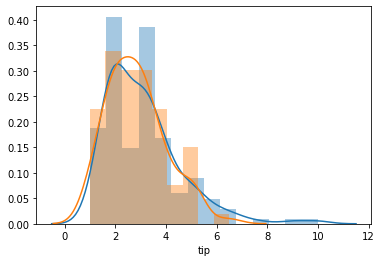

In [42]:
sns.distplot(male["tip"])
sns.distplot(female["tip"])

In [45]:
#This is another way to compare two or more categories with "plotbox" it could be done without rearenging original data.

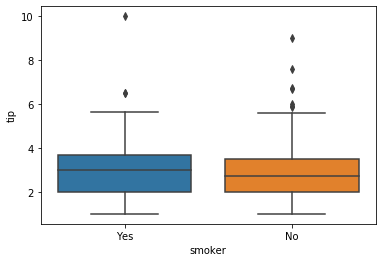

In [54]:
sns.boxplot("smoker", y = "tip", data = df)

In [56]:
df.groupby(by = "smoker")["tip"]. describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
Yes,93.0,3.008710,1.401468,1.0,2.0,3.00,3.680,10.0
No,151.0,2.991854,1.377190,1.0,2.0,2.74,3.505,9.0


In [57]:
df.groupby(by = "smoker")["tip"]. describe().T

smoker,Yes,No
count,93.000000,151.000000
mean,3.008710,2.991854
std,1.401468,1.377190
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,2.740000
75%,3.680000,3.505000
max,10.000000,9.000000


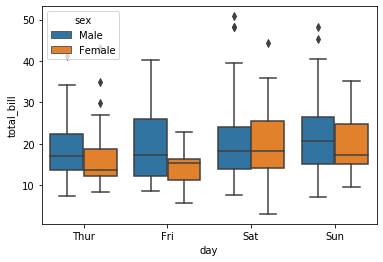

In [60]:
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df)

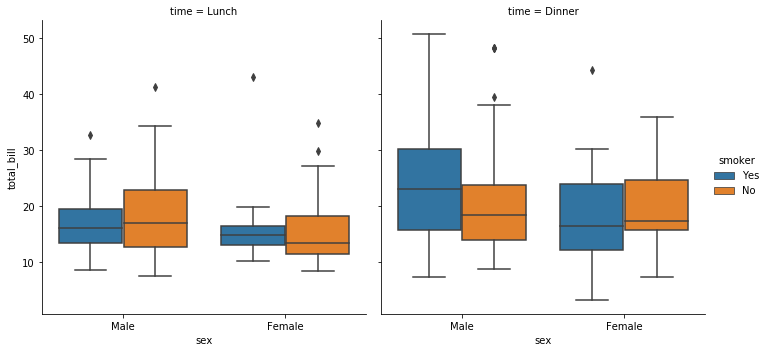

In [64]:
sns.catplot(x= "sex", y= "total_bill", hue ="smoker", col = "time", data=df, kind = "box")

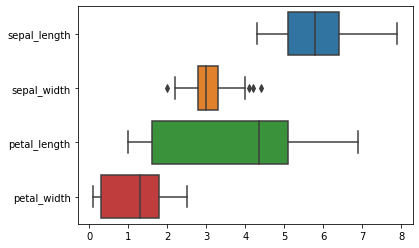

In [76]:
sns.boxplot(data=iris, orient="h")

In [82]:
sns.violinplot(x=iris.species, y=iris.sepal_lenght)

AttributeError: 'DataFrame' object has no attribute 'sepal_lenght'

In [83]:
titanic = sns.load_dataset('titanic')

In [84]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
